# Credit card Risk Assessment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
credit_df=pd.read_csv('Credit_default_dataset.csv')
credit_df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
# Here we drop unnecessary columns
credit_df=credit_df.drop('ID',axis=1)

In [4]:
credit_df.rename(columns={'PAY_0':'PAY_1'},inplace=True)

In [5]:
credit_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
credit_df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

Here 1 means education in school and 2 means high school 3 means college ,4 means university and 0,5,6 we dont have information 
about this so we merge these records into 4 and same implementation with marriage feature

In [7]:
credit_df['EDUCATION']=credit_df['EDUCATION'].map({0:4,1:1,2:2,3:3,4:4,5:4,6:4})
credit_df['MARRIAGE']=credit_df['MARRIAGE'].map({0:3,1:1,2:2,3:3})

In [8]:
credit_df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

Here we need to scaling the features, because all features are not having same units

In [9]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X=credit_df.drop('default.payment.next.month',axis=1)
X=scaler.fit_transform(X)

In [10]:
y=credit_df['default.payment.next.month']

## Model implementation

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [12]:
from sklearn.ensemble import RandomForestClassifier

# create the classifier with n_estimators = 100
rfc=RandomForestClassifier(n_estimators=100,random_state=0)

# fit the model to the training set
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [13]:
# predicting the test set
y_pred=rfc.predict(X_test)

In [14]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc,X,y,cv=10)

In [15]:
score.mean()

0.8155999999999999

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.63      0.36      0.46      1960

    accuracy                           0.81      9000
   macro avg       0.73      0.65      0.67      9000
weighted avg       0.79      0.81      0.80      9000



From the above report we notice that precision,recall and f1 score are very low for class 1 .it is due to imbalance in data

RandomForest: 0.7585636378130797


Text(0, 0.5, 'True Positive Rate')

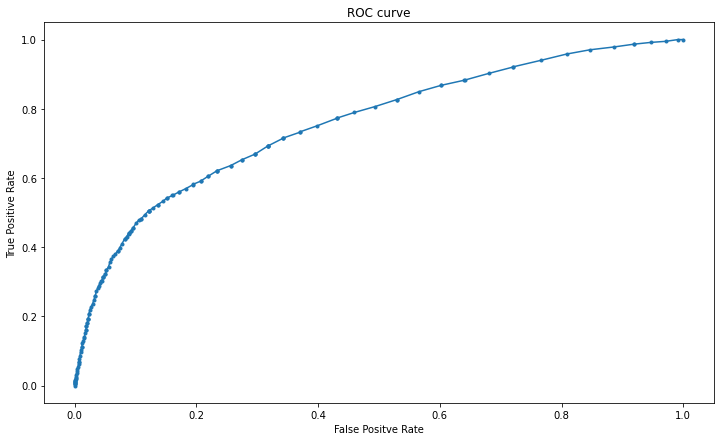

In [17]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#predict probabilities
f1_prob=rfc.predict_proba(X_test)

# keep probabilities for the positive outcome only
f1_prob=f1_prob[:,1]

# calculate scores then print them

f1_auc=roc_auc_score(y_test,f1_prob)
print('RandomForest:', f1_auc)

# calculate roc curves

f1_fpr,f1_tpr,_=roc_curve(y_test,f1_prob)

# plot the roc curve for the model
plt.figure(figsize=(12,7))
plt.plot(f1_fpr,f1_tpr,marker='.')
plt.title('ROC curve')
plt.xlabel('False Positve Rate')
plt.ylabel('True Positive Rate')

## Oversampling

In [18]:
df_score_0,df_score_1=credit_df['default.payment.next.month'].value_counts()
print('count_0 =',df_score_0,'count_1 =',df_score_1)

count_0 = 23364 count_1 = 6636


In [19]:
df_class_0=credit_df[credit_df['default.payment.next.month']==0]
df_class_1=credit_df[credit_df['default.payment.next.month']==1]
print(df_class_0.shape)
print(df_class_1.shape)

(23364, 24)
(6636, 24)


In [20]:
df_over_1=df_class_1.sample(df_score_0,replace=True,axis=0)

df_oversample=pd.concat([df_over_1,df_class_0],axis=0)

df_oversample.shape

(46728, 24)

In [21]:
X1=df_oversample.drop('default.payment.next.month',axis=1)
y1=df_oversample['default.payment.next.month']

## model implementation

In [22]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.3,random_state=42,stratify=y1)

In [23]:
from sklearn.ensemble import RandomForestClassifier

# create the classifier with n_estimators = 100
rfc=RandomForestClassifier(n_estimators=100,random_state=0)

# fit the model to the training set
rfc.fit(X1_train,y1_train)

RandomForestClassifier(random_state=0)

In [24]:
# predicting the test set
y1_pred=rfc.predict(X1_test)

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      7010
           1       0.90      0.95      0.93      7009

    accuracy                           0.92     14019
   macro avg       0.92      0.92      0.92     14019
weighted avg       0.92      0.92      0.92     14019



Here we got better accuracy and f1 score

In [26]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#predict probabilities
f_prob=rfc.predict_proba(X1_test)

# keep probabilities for the positive outcome only
f_prob=f_prob[:,1]

# calculate scores then print them

f_auc=roc_auc_score(y1_test,f_prob)
print('RandomForest:', f_auc)


RandomForest: 0.9726425714320024


In [27]:
# calculate roc curves

f_fpr,f_tpr,_=roc_curve(y1_test,f_prob)

Text(0, 0.5, 'True Positive Rate')

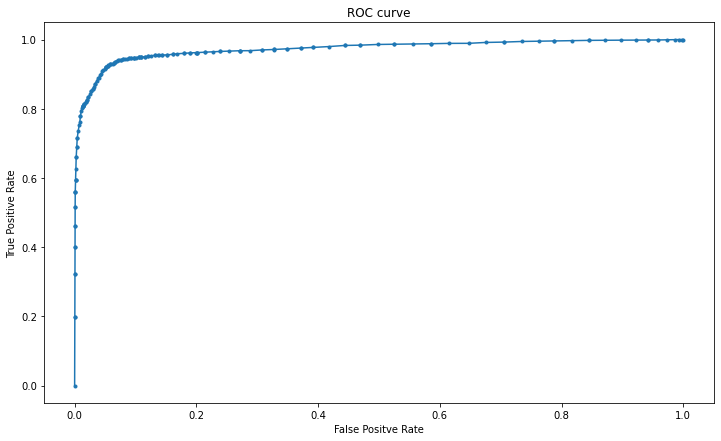

In [28]:
# plot the roc curve for the model
plt.figure(figsize=(12,7))
plt.plot(f_fpr,f_tpr,marker='.')
plt.title('ROC curve')
plt.xlabel('False Positve Rate')
plt.ylabel('True Positive Rate')